In [ ]:
#Import all of the necessary packages

In [1]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
#First make headers for the columns of the data and specify the music directories

In [3]:
header = 'chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

good_music_dir = '/home/fernando/Music/Good'
bad_music_dir = '/home/fernando/Music/Bad'
pred_music_dir = '/home/fernando/Music/Prediction'

In [4]:
#Calculate the relevant features for the songs in the "good" directory.
#These songs are labelled with a '1'

In [5]:
file = open('data.csv', 'w', newline = '')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
for song in os.listdir(good_music_dir):
    if song != '.ipynb_checkpoints':
        songname = f'{good_music_dir}/{song}'
        y, sr = librosa.load(songname)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        rms = librosa.feature.rms(y=y)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        
        row = f'{np.mean(chroma_stft)} {np.mean(rms)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}' 

        for feature in mfcc:
            row += f' {np.mean(feature)}'
        row += f' 1'
        print(row.split())
        file = open('data.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(row.split())

['0.35008811950683594', '0.1302279233932495', '1784.1658495387549', '2002.4490601176958', '3805.8396058403423', '0.08304482066898686', '-113.57064819335938', '121.57179260253906', '-19.168142318725586', '42.36642074584961', '-6.364664077758789', '18.623498916625977', '-13.704889297485352', '15.34315013885498', '-12.274109840393066', '10.976572036743164', '-8.326573371887207', '8.803791999816895', '-3.672299861907959', '5.747994899749756', '-5.162881851196289', '0.7527398467063904', '-1.6902146339416504', '-0.40897896885871887', '-2.3035225868225098', '1.221290111541748', '1']
['0.3409135937690735', '0.09594780951738358', '1530.1766787460795', '2039.0365160924296', '3550.5220984084976', '0.05603980870552978', '-207.50169372558594', '123.99126434326172', '8.955126762390137', '35.87765121459961', '2.9073197841644287', '21.510467529296875', '-8.560436248779297', '23.370685577392578', '-10.099660873413086', '11.900497436523438', '-5.555639266967773', '5.376327037811279', '-2.231760263442993

In [6]:
#Do a brief sanity-check on the data

In [20]:
data = pd.read_csv('data.csv')
data.head()
len(data)

966

In [8]:
#Do the same as before with the music in the 'bad' directory.
#These songs are labelled with '0'

In [9]:
for song in os.listdir(bad_music_dir):
    if song != '.ipynb_checkpoints':
        songname = f'{bad_music_dir}/{song}'
        y, sr = librosa.load(songname)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        rms = librosa.feature.rms(y=y)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        
        row = f'{np.mean(chroma_stft)} {np.mean(rms)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}' 

        for feature in mfcc:
            row += f' {np.mean(feature)}'
        row += f' 0'
        print(songname, row.split())
        file = open('data.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(row.split())

/home/fernando/Music/Bad/classical.00000.wav ['0.2523919343948364', '0.036244891583919525', '1505.1664239695372', '1559.0057403444712', '2716.306158008266', '0.0982227015661253', '-268.1955261230469', '135.6919708251953', '-34.05140686035156', '25.615514755249023', '-12.977584838867188', '17.90298843383789', '-9.990348815917969', '5.630702495574951', '-14.142572402954102', '7.490303993225098', '-3.969332218170166', '8.258573532104492', '-1.3353265523910522', '-0.3650517165660858', '1.0393413305282593', '3.791384220123291', '-0.32078301906585693', '1.7729853391647339', '0.8892337679862976', '-0.8420253396034241', '0']
/home/fernando/Music/Bad/classical.00001.wav ['0.21499504148960114', '0.030625173822045326', '1360.6436715050686', '1441.2431338982612', '2387.7291296584976', '0.08776562802107502', '-324.0611572265625', '133.59457397460938', '-25.044692993164062', '24.552644729614258', '-11.94702434539795', '17.667558670043945', '-5.524336338043213', '1.7110507488250732', '-10.57714176177

In [23]:
good_bad = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(good_bad)

In [24]:
#Scale the data and split the data into training and validation data

In [25]:
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [26]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, LSTM, Lambda
from tensorflow.python.keras.callbacks import LambdaCallback
from tensorflow.python.keras.regularizers import l2
import tensorflow as tf

In [51]:
model = Sequential()
model.add(Dense(512, activation = 'relu', input_shape = (x_train.shape[1],), kernel_regularizer = l2(0.001)))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 512)               13824     
_________________________________________________________________
dense_21 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 129       
Total params: 178,177
Trainable params: 178,177
Non-trainable params: 0
_________________________________________________________________


In [52]:
simple_log = LambdaCallback(on_epoch_end = lambda e, l: print(e, end = '.'))

E = 50

h = model.fit(
    x_train, y_train,
    epochs = E,
    validation_data = (x_test, y_test),
    callbacks = [simple_log],
    verbose = False
)

0.1.2.3.4.5.6.7.8.9.10.11.12.13.14.15.16.17.18.19.20.21.22.23.24.25.26.27.28.29.30.31.32.33.34.35.36.37.38.39.40.41.42.43.44.45.46.47.48.49.

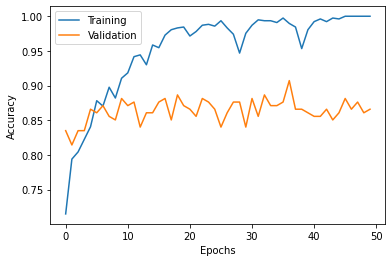

In [53]:
plt.plot(range(E), h.history['accuracy'], label = 'Training')
plt.plot(range(E), h.history['val_accuracy'], label = 'Validation')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.savefig('acc_mfcc.png')
plt.show()

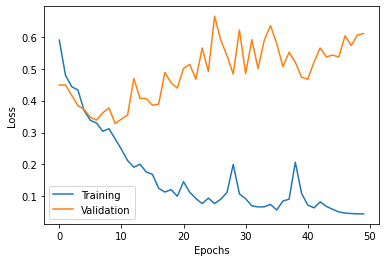

In [54]:
plt.plot(range(E), h.history['loss'], label = 'Training')
plt.plot(range(E), h.history['val_loss'], label = 'Validation')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.savefig('loss_mfcc.png')
plt.show()

In [55]:
loss, acc = model.evaluate(x_test, y_test)
print('Test set accuracy: ', acc *100)

7/7 [==============================] - 0s 2ms/step - loss: 0.6101 - accuracy: 0.8660
Test set accuracy:  86.59793734550476
